# <div align = "center">Applied Data Science Capstone, Week 2<br>Part 2: Regression Model</div>

In this code I will develop a regression model to determine the restaurant rating based on the neighbourhood and its category.

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
df = pd.read_csv('ratings.csv')
df.head()

,nbh_num,cat_1,cat_2,price_tier,likes,rating,CAD / ft²·month,Neighbourhood,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),After-tax income: Average amount ($)
0,1,Chinese Restaurant,Buffet,1,37,7.2,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
1,1,Burger Joint,None,1,5,7.1,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
2,1,Mediterranean Restaurant,Turkish Restaurant,2,6,6.2,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
3,1,Sandwich Place,Fast Food Restaurant,1,1,6.2,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
4,1,Restaurant,None,2,17,6.6,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066


In [59]:
#Create the features used for the model, drop colums that will not be used:
df.drop(['cat_2', 'Neighbourhood'], axis = 1, inplace = True)

In [60]:
df.head()

,nbh_num,cat_1,price_tier,likes,rating,CAD / ft²·month,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),After-tax income: Average amount ($)
0,1,Chinese Restaurant,1,37,7.2,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
1,1,Burger Joint,1,5,7.1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
2,1,Mediterranean Restaurant,2,6,6.2,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
3,1,Sandwich Place,1,1,6.2,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
4,1,Restaurant,2,17,6.6,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066


In [185]:
X = df.iloc[:,range(5,15)]
X.insert(0, 'nbh_num', df.nbh_num)
X

,nbh_num,CAD / ft²·month,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),After-tax income: Average amount ($)
0,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
1,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
2,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
3,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
4,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
...,...,...,...,...,...,...,...,...,...,...,...
322,138,0.981618,22776,7051,4180,3130,9180,2825,3505,560,26865
323,139,2.063308,16724,5395,3365,2360,6685,2095,2225,430,28634
324,139,2.063308,16724,5395,3365,2360,6685,2095,2225,430,28634
325,139,2.063308,16724,5395,3365,2360,6685,2095,2225,430,28634


In [186]:
Y = df.rating.to_frame(name = 'rating')
Y

,rating
0,7.2
1,7.1
2,6.2
3,6.2
4,6.6
...,...
322,6.3
323,6.7
324,6.1
325,6.0


In [187]:
one_hot = pd.get_dummies(df[['cat_1']], prefix="", prefix_sep="")

In [188]:
X_coded = X.join(one_hot, how = 'left')

In [189]:
X_coded

,nbh_num,CAD / ft²·month,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),...,Seafood Restaurant,Steakhouse,Sushi Restaurant,Syrian Restaurant,Taco Place,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Xinjiang Restaurant
0,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,...,0,0,0,0,0,0,0,0,0,0
1,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,...,0,0,0,0,0,0,0,0,0,0
2,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,...,0,0,0,0,0,0,0,0,0,0
3,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,...,0,0,0,0,0,0,0,0,0,0
4,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,138,0.981618,22776,7051,4180,3130,9180,2825,3505,560,...,0,0,0,0,0,0,0,0,0,0
323,139,2.063308,16724,5395,3365,2360,6685,2095,2225,430,...,0,0,0,0,0,0,0,0,0,0
324,139,2.063308,16724,5395,3365,2360,6685,2095,2225,430,...,0,0,0,0,0,0,0,0,0,0
325,139,2.063308,16724,5395,3365,2360,6685,2095,2225,430,...,0,0,0,0,0,0,0,0,0,0


In [190]:
#Define the model
lm = LinearRegression()

In [191]:
#Fit the model
lm.fit(X_coded, Y)

LinearRegression()

In [192]:
#Make a baseline prediction:
Y_baseline = lm.predict(X_coded)

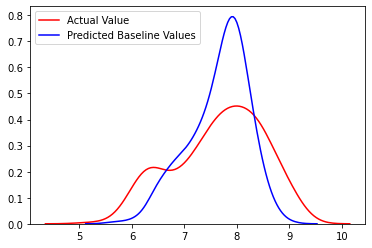

In [193]:
#Plot the distribution:
ax1 = sns.distplot(Y, hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Y_baseline, hist = False, color = 'b', label = 'Predicted Baseline Values', ax = ax1)

In [198]:
#Evaluate the model:
print('MSE: ', mean_squared_error(Y, Y_baseline), '\nR2 Score: ', r2_score(Y, Y_baseline))

MSE:  0.39910949901541215 
R2 Score:  0.4468500750960964


In [199]:
#Split the data in training data and testing data:
x_train, x_test, y_train, y_test = train_test_split(X_coded, Y, test_size = 0.2, random_state = 1)

In [200]:
#Define a new linear regression model:
lm_2 = LinearRegression()

In [201]:
#Train the model using the training data:
lm_2.fit(x_train, y_train)

LinearRegression()

In [202]:
#Make a prediction on the test data:
Y_trained = lm_2.predict(x_test)

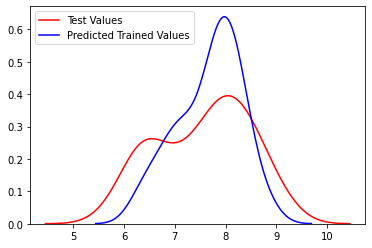

In [203]:
#Plot the distribution on the test data:
ax2 = sns.distplot(y_test, hist = False, color = 'r', label = 'Test Values')
sns.distplot(Y_trained, hist = False, color = 'b', label = 'Predicted Trained Values', ax = ax2)

In [206]:
#Evaluate the model
print('MSE: ', mean_squared_error(y_test, Y_trained), '\nR2 Score: ', r2_score(y_test, Y_trained))

MSE:  0.6245765758279755 
R2 Score:  0.23268656754914796


The model is doing poorly with the current features, I will now add polynomial features to try to improve accuracy

In [207]:
#Defining the polynomial feature:
pr = PolynomialFeatures(degree = 2)

In [208]:
#Tranforming the X training and test data:
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [209]:
#Making the polynomial regression:
lm_poly = LinearRegression()
lm_poly.fit(x_train_pr, y_train)

LinearRegression()

In [210]:
#Make the prediction on the transformed test data:
y_lm_poly = lm_poly.predict(x_test_pr)

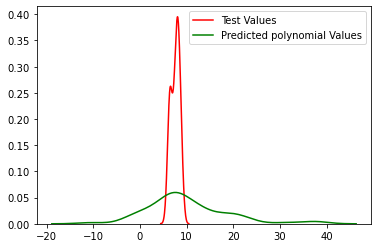

In [211]:
#Plot the distribution on the test data:
ax3 = sns.distplot(y_test, hist = False, color = 'r', label = 'Test Values')
sns.distplot(y_lm_poly, hist = False, color = 'g', label = 'Predicted polynomial Values', ax = ax3)

In [212]:
#Evaluate the model
print('MSE: ', mean_squared_error(y_test, y_lm_poly), '\nR2 Score: ', r2_score(y_test, y_lm_poly))

MSE:  81.43805021105243 
R2 Score:  -99.04939707626565


It seems the model is too flexible including the restaurant categories. I will try a polynomial regression without using the encoded categorical values

In [213]:
#Make a new split of the data using the X dataframe, without one hot encoding:
x_train_nc, x_test_nc, y_train_nc, y_test_nc = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [214]:
#Create the polynomial features on the X data frame:
pr_2 = PolynomialFeatures(degree = 2)
x_train_nc_pr = pr.fit_transform(x_train_nc)
x_test_nc_pr = pr.fit_transform(x_test_nc)

In [215]:
#Making the polynomial regression:
lm_poly_nc = LinearRegression()
lm_poly_nc.fit(x_train_nc_pr, y_train_nc)

LinearRegression()

In [216]:
#Make the prediction on the transformed test data, without categorical encoding:
y_lm_poly_nc = lm_poly_nc.predict(x_test_nc_pr)

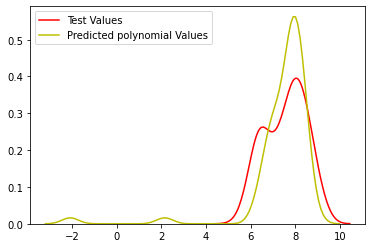

In [217]:
ax4 = sns.distplot(y_test_nc, hist = False, color = 'r', label = 'Test Values')
sns.distplot(y_lm_poly_nc, hist = False, color = 'y', label = 'Predicted polynomial Values', ax = ax4)

In [218]:
#Evaluate the model
print('MSE: ', mean_squared_error(y_test, y_lm_poly_nc), '\nR2 Score: ', r2_score(y_test, y_lm_poly_nc))

MSE:  1.6955593187442308 
R2 Score:  -1.0830519285244535


In [ ]:
def 